In [65]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

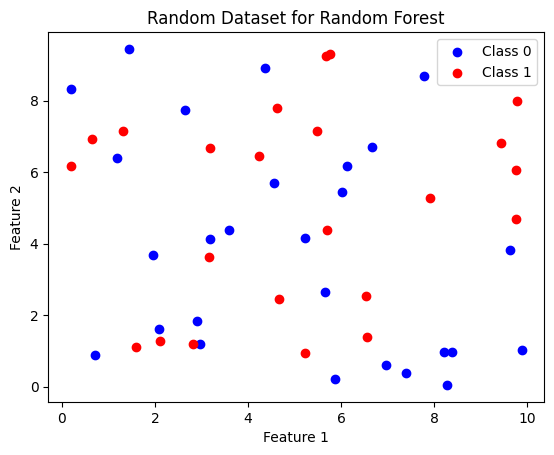

In [66]:
np.random.seed(0)

# Features: 50 points, 2 features each
X = np.random.uniform(0, 10, (50, 2))

# Labels: 0 or 1 randomly
y = np.random.randint(0, 2, 50)

# Visualize dataset
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random Dataset for Random Forest")
plt.legend()
plt.show()

In [67]:
def decision_stump(X, y):
    # Find best feature and threshold to split
    n_features = X.shape[1]
    best_feature = None
    best_threshold = None
    best_accuracy = 0

    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for t in thresholds:
            y_pred = (X[:, feature] >= t).astype(int)
            acc = np.mean(y_pred == y)
            if acc > best_accuracy:
                best_accuracy = acc
                best_feature = feature
                best_threshold = t
    return best_feature, best_threshold

In [69]:
def random_forest_predict(X_train, y_train, X_test, n_trees=5, sample_size=30):
    trees = []
    # Build trees
    for _ in range(n_trees):
        # Random sample with replacement
        idx = np.random.choice(len(X_train), sample_size, replace=True)
        X_sample = X_train[idx]
        y_sample = y_train[idx]
        feature, threshold = decision_stump(X_sample, y_sample)
        trees.append((feature, threshold))

    # Predict
    y_pred = []
    for x in X_test:
        votes = []
        for feature, threshold in trees:
            vote = 1 if x[feature] >= threshold else 0
            votes.append(vote)
        # Majority vote
        y_pred.append(Counter(votes).most_common(1)[0][0])
    return np.array(y_pred)

In [70]:
# Predict on training data itself
y_pred = random_forest_predict(X, y, X, n_trees=5, sample_size=30)

# Accuracy
accuracy = np.mean(y_pred == y)
print(f"Random Forest training accuracy: {accuracy*100:.2f}%")

Random Forest training accuracy: 56.00%


In [71]:
# 5 random test points
test_points = np.random.uniform(0, 10, (5,2))
y_test_pred = random_forest_predict(X, y, test_points, n_trees=5, sample_size=30)

for i, point in enumerate(test_points):
    print(f"Test point {point} predicted class: {y_test_pred[i]}")

Test point [3.24682972 5.19711194] predicted class: 0
Test point [5.53568650e-04 3.11860221e+00] predicted class: 0
Test point [4.25451538 8.8533766 ] predicted class: 0
Test point [6.79879456 4.56129772] predicted class: 0
Test point [4.83408617 7.88739428] predicted class: 0


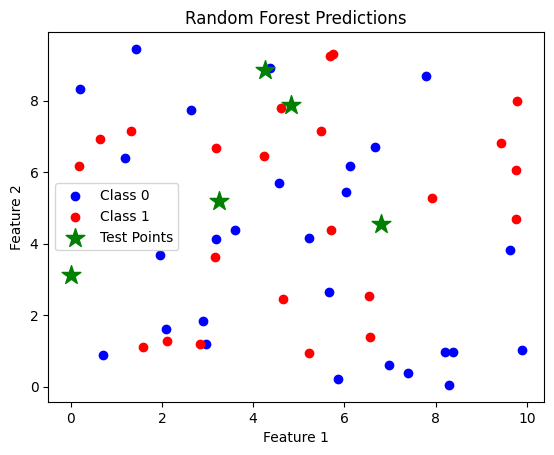

In [72]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')
plt.scatter(test_points[:,0], test_points[:,1], color='green', marker='*', s=200, label='Test Points')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random Forest Predictions")
plt.legend()
plt.show()